# Classification with stumbleupon data

Project 4 has been changed since scraping was untenable. The project now focuses on the stumbleupon kaggle dataset. For more information on this dataset, [check out the website here](https://www.kaggle.com/c/stumbleupon).

---

# Table of Contents

1. [Data Dictionary](#datadict)
2. [Regression](#reggresion)  
    2.1 [StatsModel Logistic Regression](#statsmodels logreg)  
    2.2[Category Logistic Regression](#categorylr)

## 1. Load in the dataset

This is the only part completed for you.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

%matplotlib inline

In [2]:
su = pd.read_csv('../dataset/evergreen.tsv', delimiter='\t')

## 2. Clean up/examine your data

Some of the columns may have values that need changing or that are of the wrong type. There could also be columns that aren't very useful.

---

In [ ]:
su.head(10)

## Data Dictionary
<a id="datadict"></a>

|Column Name|Description|Variable Type|
|---|---|--|
|url|URL of the recommended website|Categorical|
|urlid|Unique StumbleUpon ID assigned to the URL|Ordinal|
|boilerplate|JSON file containing the text of the title and the text of the body|Categorical|
|alchemy_category|Category of the website assigned through AlchemyAPI|Categorical|
|alchemy_category_score|Score from 1(best) to 0(worst) of the confidence of the AlchemyAPI in assigning the category|Interval|
|avglinksize|Mean number of words that appear in all the links present on the wepsite|Cardinal|
|commonLinkRatio_(1-4)| The number of links sharing at least one word in common with x other links divided by total number of links|Interval|
|compression_ratio|Ratio of compressed size of website to uncompressed size (using gzip)|Interval|
|embed_ratio| Ratio of how many times HTML embed element appears relative to other elements|Interval|
|frameBased|Whether or not a website is using a frameset markup(1) or a body(0)|Categorical|
|frameTagRatio|Ratio of frames to markup|Interval|
|hasDomainLink|Whether(1) or not(0) the website has a link to a domain|Categorical|
|html_ratio|How many tags are present to total text span on the website|Interval|
|image_ratio|Ratio of <img> tags to total text span on the website|Interval|
|is_news|Whether(1) or not(0) the website is categorized as news|Categorical|
|lengthyLinkDomain|Whether(1) or not(0) at least three links contain >30 characters|Categorical|
|linkwordscore|Ratio of words on page to the hyperlink text|Interval|
|news_front_page|Whether(1) or not(0) the news is considered significant 'front page'|Categorical|
|non_markup_alphanum_characters|Total number of characters in the text of the website|Ordinal|
|numberOfLinks|Count of how many links are present|Ordinal
|numwords_in_url|Count of words in the URL|Ordinal|
|parametrizedLinkRatio|Ratio of links with an event on the click or additonal parameter to all other links|Interval|
|spelling_errors_ratio|Ratio of words classified as misspelled to all text present|Interval|
|label| **TARGET** Whether(1) or not(0) the website is considered 'evergreen'|Categorical|

* What makes evergreen news stories? Are there any?
* Does AlchemyAPI score play into whether it is evergreen?
* Is FrameSet or Body more likely to be evergreen?
* Are there evergreen front page news stories? What text do they contain?

In [29]:
su.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5053 entries, 0 to 7393
Data columns (total 29 columns):
url                               5053 non-null object
urlid                             5053 non-null int64
boilerplate                       5053 non-null object
alchemy_category                  5053 non-null object
alchemy_category_score            5053 non-null object
avglinksize                       5053 non-null float64
commonlinkratio_1                 5053 non-null float64
commonlinkratio_2                 5053 non-null float64
commonlinkratio_3                 5053 non-null float64
commonlinkratio_4                 5053 non-null float64
compression_ratio                 5053 non-null float64
embed_ratio                       5053 non-null float64
framebased                        5053 non-null int64
frameTagRatio                     5053 non-null float64
hasDomainLink                     5053 non-null int64
html_ratio                        5053 non-null float64
image_r

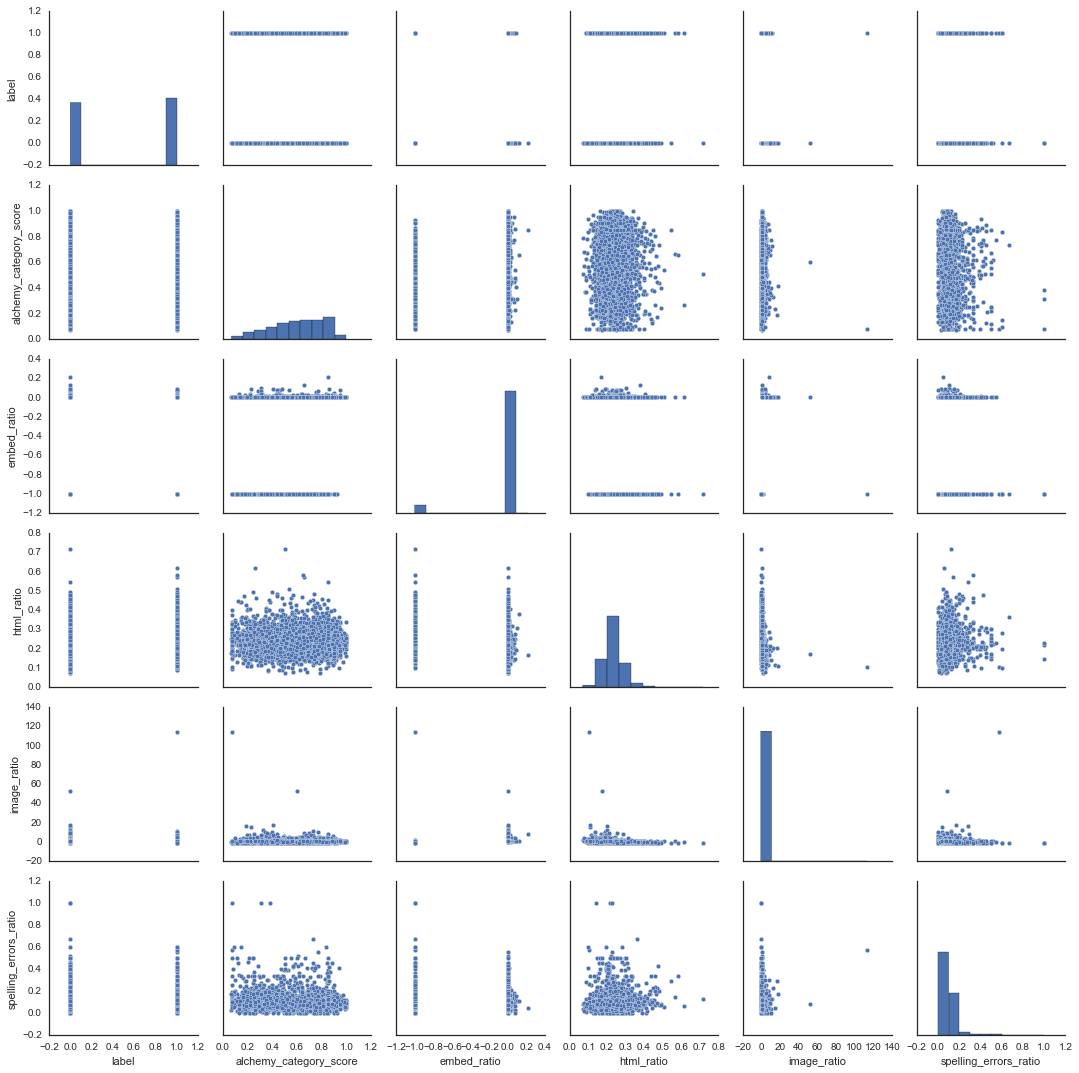

In [32]:
sns.pairplot(su[['label','alchemy_category_score',
   'embed_ratio', 'html_ratio', 'image_ratio', 'spelling_errors_ratio']])

*Through looking at the description of the variables present, certain items related to the URL are likely not important to the regression at hand. Because of the nature of stumbleupon, the URL itself and associated identifiers are likely not that important*

In [ ]:
su_log = su[
    [
'label',
'spelling_errors_ratio',
'alchemy_category',
'alchemy_category_score',
'framebased',
'html_ratio',
'image_ratio',
'is_news',
'news_front_page',
    ]
]

## 3. Use statsmodels' logistic regression function to look at variable significance
<a id="statsmodels logreg"></a>

The **`import statsmodels.formula.api as smf`** code below gives us access to a statsmodels api that can run logistic regressions using patsy-style formulas.

Ex:

```python
formula = 'target ~ var1 + var2 + C(var3) -1'
logreg = smf.logit(formula, data=data)
logreg_results = logreg.fit()
print logreg_results.summary()
```

---

In [4]:
# Import appropriate pacakges
import statsmodels.formula.api as smf
import patsy

In [11]:
# Create Formula
formula = 'label ~ html_ratio + image_ratio + embed_ratio + frameTagRatio +parametrizedLinkRatio + spelling_errors_ratio - 1' # -1 used to remove the intercept

In [12]:
logr = smf.logit(formula, data=su) # Perform Logit function on provided formula

In [13]:
logr_result = logr.fit()           # Fit the model

Optimization terminated successfully.
         Current function value: 0.673377
         Iterations 5


In [14]:
print logr_result.summary()       # Print out the summary results from the regression

                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 7395
Model:                          Logit   Df Residuals:                     7389
Method:                           MLE   Df Model:                            5
Date:                Thu, 12 May 2016   Pseudo R-squ.:                 0.02802
Time:                        08:06:12   Log-Likelihood:                -4979.6
converged:                       True   LL-Null:                       -5123.2
                                        LLR p-value:                 5.799e-60
                            coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
html_ratio                3.0495      0.245     12.458      0.000         2.570     3.529
image_ratio              -0.0414      0.020     -2.121      0.034        -0.080    -0.003
embed_ra

### 3.1 Run a logistic regression predicting evergreen from the numeric columns

And print out the results as shown in the example above.

---

In [ ]:
formula = 'label ~ alchemy_category_score + avglinksize + compression_ratio + embed_ratio + frameTagRatio + html_ratio + image_ratio'

In [ ]:
logreg = smf.logit(formula, data=su)

In [ ]:
model = logreg.fit()

In [ ]:
print model.summary()

### 3.2 Run a logistic regression predicting evergreen from the numeric columns and a categorical variable of alchemy_category

And print out the results as shown in the example.

---

## 4. Use sklearn to cross-validate the accuracy of the model above

Normalize the numeric and categorical columns of the predictor matrix.

---

## 5. Gridsearch regularization parameters for logistic regression

Find the best regularization type (Ridge, Lasso) across a set of regularization strengths.

[NOTE: C is the inverse of the regularization strength. Lower C values are stronger regularization. Having a C higher than 1 will significantly slow down the search. I'm not particularly interested in values over 1, since this is the default regularization strength in LogisticRegression.]

**After you find the best set of parameters, build a Logistic Regression with those parameters and crossvalidate the score.**

[NOTE 2: to run Lasso regularization the solver should be `'liblinear'`]

---

## 6. Gridsearch neighbors for kNN

Find the best number of neighbors with your predictors to predict the `label` target variable.

Start by bulding a kNN model with a set number of neighbors, then use gridsearch to run through a series of neighbors.

---

## 7. Choose a new target from alchemy_category to predict with logistic regression

**Ideally your category choice will have a small fraction of the total rows, but not TOO small!**

---

In [15]:
su['alchemy_category'].value_counts()

?                     2342
recreation            1229
arts_entertainment     941
business               880
health                 506
sports                 380
culture_politics       343
computer_internet      296
science_technology     289
gaming                  76
religion                72
law_crime               31
unknown                  6
weather                  4
Name: alchemy_category, dtype: int64

### 7.1 Chose your target category, create the Y vector, and check the fraction of instances

---

<a id="categorylr"></a>
*One category that would be interesting to predict would be the culture_politics. This is since the category is rather small, but also has overlap with many of the other possible categories, making it slightly tricker to predict.*

In [38]:
su['is_culture'] = su['alchemy_category'].apply(lambda x: 1 if x == 'culture_politics' else 0)

In [39]:
su['alchemy_category'] = su['alchemy_category'].apply(lambda x: np.NaN if x == '?' else x)
su.dropna(axis=0, how='any', inplace=True)
su['alchemy_category_score'] = pd.to_numeric(su['alchemy_category_score'])

In [46]:
print "Culture and politics ratio is: ", float(len(su[su['is_culture']==1])) / len(su)

Culture and politics ratio is:  0.0678804670493


### 7.2 Use patsy to create an X matrix of the numeric predictors and all two-way interactions between them

Ex:

```python
import patsy

formula_interactions = '~ (var1 + var2 + var3)**2 -1'
X_interactions = patsy.dmatrix(formula_interactions, data=data
```

Get the column names from the `design_info` property of the patsy X matrix.

---

### 7.3 Normalize the predictor matrix columns

---

### 7.4 Gridsearch a logistic regression to predict accuracy on your new target from the interaction predictors

Include Ridge and Lasso.

---

### 7.5 Build a logistic regression with the optimal parameters, and look at the coefficients

---

### 7.6 Gridsearch parameters for a logistic regression with the same target and predictors, but score based on precision rather than accuracy

Look at the documentation.

---

## [BONUS] 8. Build models predicting from words

This is a bit of the NLP we covered in the pipeline lecture!

---

### 8.1 Choose 'body' or 'title' from the boilerplate to be the basis of your word predictors

You will need to parse the json from the boilerplate field.

---

In [ ]:
import json

### 8.2 Use CountVectorizer to create your predictor matrix from the string column

It is up to you what range of ngrams and features, and whether or not you want the columns binary or counts.

---

### 8.3 Gridsearch a logistic regression predicting accuracy of your chosen target category from word predictor matrix

---

### 8.4 Do the same as above, but score the gridsearch based on precision rather than accuracy

---

### 8.5 Build a logistic regression with optimal precision categories

Print out the top 20 or 25 word features as ranked by their coefficients.

---